# KEN1435 - Principles of Data Science: Lecture 4

First we load the necessary python packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Topics
In this lecture we will discuss the following topics:
- **What Are the Chances? (*Chapter 13*)**
- **The Law of Averages (*Chapter 16*)**

## What Are the Chances?

What's the chance of getting heads when tossing a coin repeatedly? In addition to calculating this by hand, we can also use simulation to determine this. 

In simulation, we look ahead at what could happen based on a model of reality. So, to simulate what is going to happen, we need to simulate the outcome of future flips, which we can sample from all possible outcomes. To do so in python, we use function from `np.random` (see the documentation [here](https://numpy.org/doc/stable/reference/random/index.html#random-sampling-numpy-random)), which contains all necessary functions for random sampling.

In the case of our example, flipping a coin, we know that there are two possible outcomes (i.e., "heads" and "tails") that are equally probable if our coin is a fair coin. To perform this sampling in our code, we need to be able to randomly sample items from a predefined set. We can use the function `choice` (see the documentation [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html#numpy.random.choice)) to do exactly this. So let's simulate a single coin toss. If we execute the cell multiple times, we can see that the value of `result` changes.

In [6]:
outcomes = ["heads", "tails"]
result = np.random.choice(outcomes, size = 100, p = [0.6, 0.4])
result

array(['tails', 'tails', 'heads', 'heads', 'tails', 'heads', 'heads',
       'heads', 'tails', 'heads', 'tails', 'heads', 'heads', 'heads',
       'tails', 'heads', 'heads', 'tails', 'heads', 'tails', 'heads',
       'heads', 'tails', 'tails', 'tails', 'heads', 'tails', 'heads',
       'tails', 'heads', 'heads', 'tails', 'tails', 'tails', 'heads',
       'tails', 'heads', 'heads', 'tails', 'heads', 'heads', 'heads',
       'heads', 'heads', 'heads', 'tails', 'heads', 'tails', 'heads',
       'tails', 'heads', 'heads', 'heads', 'tails', 'heads', 'tails',
       'heads', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads',
       'heads', 'tails', 'heads', 'heads', 'tails', 'heads', 'tails',
       'heads', 'tails', 'heads', 'tails', 'tails', 'tails', 'tails',
       'heads', 'tails', 'tails', 'tails', 'heads', 'heads', 'tails',
       'heads', 'heads', 'heads', 'heads', 'tails', 'heads', 'heads',
       'heads', 'heads', 'tails', 'tails', 'heads', 'heads', 'tails',
       'tails', 'hea

Let's simulate multiple toin cosses at once. We will start with repeating the coin tossing ten times and also calculate which fraction of the times we see head as a result

Again, if we execute the cell multiple times, we can see that `tosses` changes at each iteration.

In [11]:
num_tosses = 10
tosses = np.random.choice(outcomes, size = num_tosses)
frac_heads = (tosses == "heads").sum() / num_tosses
frac_heads

0.6

Although the changing outcome is to be expected when we use random values, in a practical setting this is not exactly what we want. To change this, we can explicitly use a random number generator (`default_rng`, see the documentation [here](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)) for which we define a seed. Effectively, by doing this, we ensure that each time we run our code, we see the exact same values. In the second year course Simulation and Statistical Analysis, we will dive more into this.

In [13]:
rng = np.random.default_rng(seed = 23)
tosses = rng.choice(outcomes, size = num_tosses)
frac_head = (tosses == "heads").sum() / num_tosses
tosses, frac_head

(array(['heads', 'tails', 'heads', 'tails', 'heads', 'heads', 'tails',
        'heads', 'heads', 'tails'], dtype='<U5'),
 0.6)

Let's increase the number of coin tosses and calculate the fraction of heads for each of these experiments

In [15]:
def flip_coins(num_tosses, rng):
    tosses = rng.choice(["heads", "tails"], size = num_tosses)
    return (tosses == "heads").sum() / num_tosses

df_tosses = pd.DataFrame(index = pd.RangeIndex(start = 10, stop = 1001), columns = ["num_tosses", "frac_heads"])

for i in np.arange(10, 1001):
    df_tosses.loc[i, "num_tosses"] = i
    df_tosses.loc[i, "frac_heads"] = flip_coins(i, rng)
    
df_tosses.T

,10,11,12,13,14,15,16,17,18,19,...,991,992,993,994,995,996,997,998,999,1000
num_tosses,10,11,12,13,14,15,16,17,18,19,...,991,992,993,994,995,996,997,998,999,1000
frac_heads,0.6,0.818182,0.666667,0.461538,0.428571,0.6,0.5,0.647059,0.5,0.526316,...,0.475277,0.514113,0.515609,0.476861,0.521608,0.475904,0.50652,0.472946,0.510511,0.485


With this many observations, it is hard to read the data frame directly. Therefore, we plot all observed fractions from our simulations in a figure. As a comparison, we also include a line with the long run fraction that we would expect as outcome.

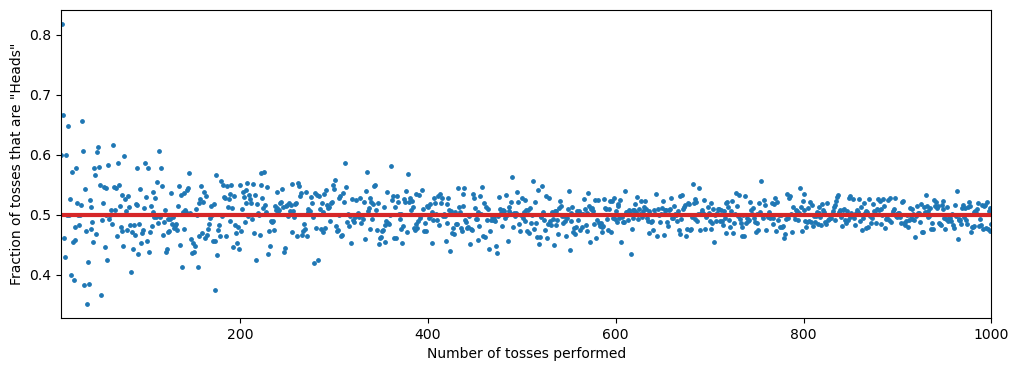

In [16]:
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(111)

df_tosses.plot.scatter("num_tosses", "frac_heads", ax = ax, s= 6, color = "C0")
ax.hlines(0.5, 10, 1000, color = "C3", lw = 3)

ax.set_ylabel('Fraction of tosses that are "Heads"')
ax.set_xlim(10, 1000)
ax.set_xlabel("Number of tosses performed")
plt.show()

As you can see, the fraction of "heads" outcomes gets closer to 50% as the number of tosses increases. This phenomenon is one of the two most important properties of statistics and data science. It's called the law of large numbers.

Let's look at another example: rolling dice. Here, we are interested in the fraction of times that a `1` is thrown.

Text(0.5, 0, 'Number of tosses performed')

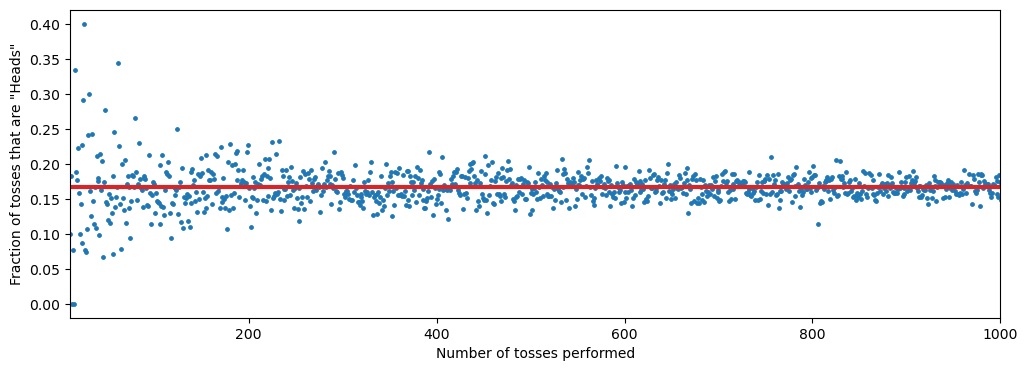

In [26]:
def simulate_outcomes(num_rep, outcomes, goal, rng):
    result = rng.choice(outcomes, size = num_rep)
    return (result == goal).sum() / num_rep

die_outcomes = np.arange(1, 7).tolist()
df_dice = pd.DataFrame(index = pd.RangeIndex(start = 10, stop = 10001), columns = ["num_rep", "frac_1"])

for i in np.arange(10, 10001):
    df_dice.loc[i, "num_rep"] = i
    df_dice.loc[i, "frac_1"] = simulate_outcomes(i, die_outcomes, 1, rng)
    
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(111)

df_dice.plot.scatter("num_rep", "frac_1", ax = ax, s= 6, color = "C0")
ax.hlines(1/6, 10, 1000, color = "C3", lw = 3)

ax.set_ylabel('Fraction of tosses that are "Heads"')
ax.set_xlim(10, 1000)
ax.set_xlabel("Number of tosses performed")


This kind of simulation is useful in general settings of chance. 

In the two examples above, we can act as if all possible outcomes are in a box that we draw from with replacement. The book also makes use of this box model for probabilistic comparisons. Next, we consider an example from the book:

```         
A box contains red marbles and blue marbles. One marble is drawn at random from the box (each marble has an equal chance to be drawn). If it is red, you win $1. If it is blue, you win nothing. You can choose between two boxes:

* box A contains 3 red marbles and 2 blue ones;
* box B contains 30 red marbles and 20 blue ones.

Which box offers a better chance of winning, or are they the same?
```

Let's try to answer this using a  As the function `simulate_outcomes` is very general in its setup, all we need to do here is to determine the proper definitions for `outcomes` and `goal` for the two situations. Since the winning requirement is the same for both, we can definesimulation.

In [27]:
goal = "red"

Next, we define the variables containing the `outcomes`.

In [30]:
boxA_outcomes = np.repeat(["red", "blue"], [3, 2])
boxB_outcomes = np.repeat(["red", "blue"], [30, 20])

Let's simulate what happens in these two scenario's.

In [31]:
frac_red_A = simulate_outcomes(1000, boxA_outcomes, goal, rng)
frac_red_B = simulate_outcomes(1000, boxB_outcomes, goal, rng)
frac_red_A, frac_red_B

(0.61, 0.596)

Both are very close. The correct answer is the chance of winning is the same. The exact calculation is:

$$
\text{winning} = \frac{\text{number of red marbles}}{\text{total number of marbles}}.
$$

# The Law of Averages
Typically, we think of flipping a coin as the quintessential example of a fair game. More specifically, we assume that the chance of getting either outcome, i.e. "heads" or "tails", is exactly the same (namely 50%). 

In 2007, Diaconis, Holmes, and Montgomery developed a model that predicts that a coin comes slightly more up the way it starts out. You can find their paper [here](http://www.jstor.org/stable/20453950). Recently, a team of researchers decided to construct a [study](https://arxiv.org/abs/2310.04153) that would provide evidence to  support the claim by Diaconis, Holmes and Montgomery. To do so, the researchers flipped $350,757$ coins and recorded the data. Moreover, they share all their data [here](https://osf.io/pxu6r/).

Let's take a look at a subset of the data. Here we take the coin flips performed by Malte Zoubek (although the data file is uploaded to canvas, you can find it [here](https://osf.io/jb47q) too).

In [ ]:
flips = 

As you can see the records are quite meticulous. For now, we will only need the information from the column `Sequence`. Let's take a closer look at the first sequence.

As this throws a `KeyError`, let's take a closer look at the column names.

Note the leading spaces in the names of the columns. This is exactly the reason why it is good practice to take your time to inspect a data set that you are given and not assume that it is of good quality. Let's try to inspect the value once more.

The sequence contains the results of the flips in one series of throws, with `h` and `t` denoting "heads" and "tails". Finally, there is a third notation, `x`. If we take a look at the video evidence that is captured of this sequence (which we can do [here](https://osf.io/yd5tz)), we can see that the fourth throw is a failed attempt. Therefore, we can treat these `x`-values as `NaN`-values. We can store this knowledge in a mapping dictionary.

Next, we process the sequence into a series of results.

So now we know how to process the information. Let's act as if all observations were done in a single sitting and combine all the sequences into a single sequence.

Let's transform this into a data frame.

First, we drop the `NaN`-values.

Note that we are now missing observations in the index, as these were previously `NaN`-values. So let's replace the index by a new one that only counts the observations without `NaN`'s.

Let's see what fraction of the observations is heads.

We can also track the progression towards this fraction.

With this progression over all throws, we can visualize how the average slowly moves towards the long run average.

# Summary

We learned

* how to calculate the chance of winning using simulations.
* sum and average in the long run.
* average in the long run.